# Apoa4: Only the controls were used for the overall analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
gene = 'Apoa4'

In [3]:
manual = pd.read_csv(gene + '_manual_annotation.csv')
pd.set_option('display.max_columns', None)
manual

,mouse_id,strain,sex,genotype,type,bw,EF_manual,FS_manual,LVIDd_manual,LVIDs_manual
0,30511288,C57BL/6N,m,control,wt (Apoa4),28.8,70.03,38.47,3.33,2.03


In [4]:
filtered_data = pd.read_csv(gene + '_data_filtered_plus_functional_parameter_plus_manual_measurements.csv')
filtered_data

,mouse_id,file,LVIDd_auto,LVIDd_auto_time,LVIDs_auto,LVIDs_auto_time,heart_rate_auto,heart_rate_auto_time,LVIDd_auto_quality_label,LVIDd_auto_quality_flag,LVIDs_auto_quality_label,LVIDs_auto_quality_flag,LV_Vold_auto,LV_Vols_auto,EF_auto,FS_auto,strain,sex,genotype,type,bw,EF_manual,FS_manual,LVIDd_manual,LVIDs_manual,dif_LVIDd,mean_LVIDd,dif_LVIDs,mean_LVIDs,dif_EF,dif_FS
0,30511288,Apoa4_1vX_8.dcm,2.910174,1.146667,1.382849,1.181667,847.058824,1.146667,0.598393,high,0.598393,high,32.489746,4.893315,84.938894,52.482270,C57BL/6N,m,control,wt (Apoa4),28.8,70.03,38.47,3.33,2.03,-0.419826,3.120087,-0.647151,1.706424,14.908894,14.012270
1,30511288,Apoa4_1vX_8.dcm,2.951453,1.217500,1.320930,1.258333,692.307692,1.217500,0.598393,high,0.598393,high,33.630561,4.335969,87.107058,55.244755,C57BL/6N,m,control,wt (Apoa4),28.8,70.03,38.47,3.33,2.03,-0.378547,3.140727,-0.709070,1.675465,17.077058,16.774755
2,30511288,Apoa4_1vX_8.dcm,3.075291,3.097500,1.362209,3.048333,685.714286,3.097500,0.879534,high,0.879534,high,37.183424,4.703126,87.351552,55.704698,C57BL/6N,m,control,wt (Apoa4),28.8,70.03,38.47,3.33,2.03,-0.254709,3.202645,-0.667791,1.696105,17.321552,17.234698
3,30511288,Apoa4_1vX_8.dcm,2.600581,3.185000,1.424128,3.133333,847.058824,3.185000,0.879534,high,0.879534,high,24.620048,5.287040,78.525467,45.238095,C57BL/6N,m,control,wt (Apoa4),28.8,70.03,38.47,3.33,2.03,-0.729419,2.965291,-0.605872,1.727064,8.495467,6.768095
4,30511288,Apoa4_1vX_8.dcm,3.116570,3.255833,1.836919,3.217500,757.894737,3.255833,0.986274,high,0.879534,high,38.411342,10.240417,73.340121,41.059603,C57BL/6N,m,control,wt (Apoa4),28.8,70.03,38.47,3.33,2.03,-0.213430,3.223285,-0.193081,1.933459,3.310121,2.589603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,30511288,Apoa4_1vX_10.dcm,3.281686,4.407500,1.465407,4.365000,720.000000,4.407500,0.995298,high,0.995298,high,43.542353,5.698723,86.912229,55.345912,C57BL/6N,m,control,wt (Apoa4),28.8,70.03,38.47,3.33,2.03,-0.048314,3.305843,-0.564593,1.747703,16.882229,16.875912
70,30511288,Apoa4_1vX_10.dcm,3.199128,4.490833,1.547965,4.454167,791.208791,4.490833,0.995298,high,0.995298,high,40.932895,6.576703,83.932964,51.612903,C57BL/6N,m,control,wt (Apoa4),28.8,70.03,38.47,3.33,2.03,-0.130872,3.264564,-0.482035,1.788983,13.902964,13.142903
71,30511288,Apoa4_1vX_10.dcm,3.157849,4.566667,1.692442,4.534167,679.245283,4.566667,0.946855,high,0.946855,high,39.661152,8.291952,79.093012,46.405229,C57BL/6N,m,control,wt (Apoa4),28.8,70.03,38.47,3.33,2.03,-0.172151,3.243924,-0.337558,1.861221,9.063012,7.935229
72,30511288,Apoa4_1vX_10.dcm,3.199128,4.655000,1.609884,4.615833,620.689655,4.655000,0.946855,high,0.946855,high,40.932895,7.283662,82.205847,49.677419,C57BL/6N,m,control,wt (Apoa4),28.8,70.03,38.47,3.33,2.03,-0.130872,3.264564,-0.420116,1.819942,12.175847,11.207419


In [5]:
mice_manual = np.unique(manual['mouse_id'])
mice_automatic = np.unique(filtered_data['mouse_id'])
mice_manual==mice_automatic

array([ True])

## Differences between automatic and manual measurements

In [6]:
sns.set_style("whitegrid")
colors1="Spectral"
colors2="tab:red"

### Overview per line

<AxesSubplot:xlabel='mouse_id', ylabel='LVIDs_manual'>

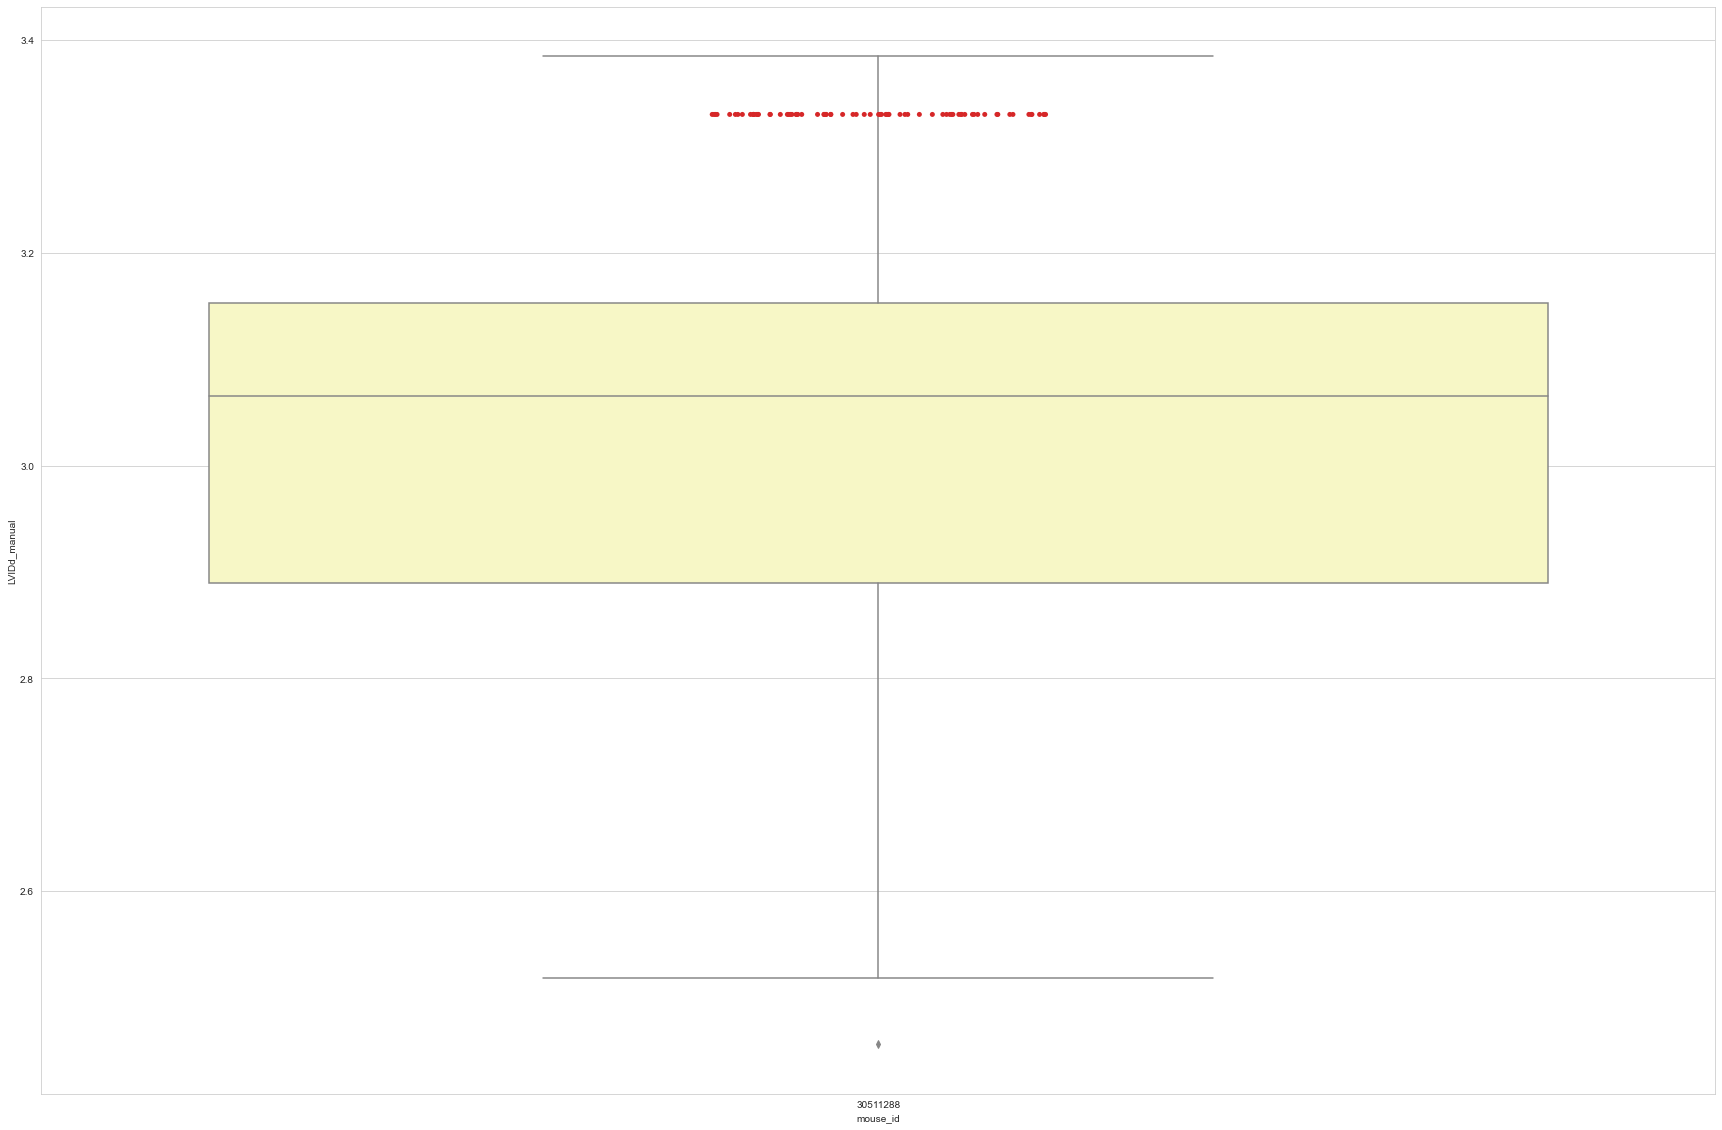

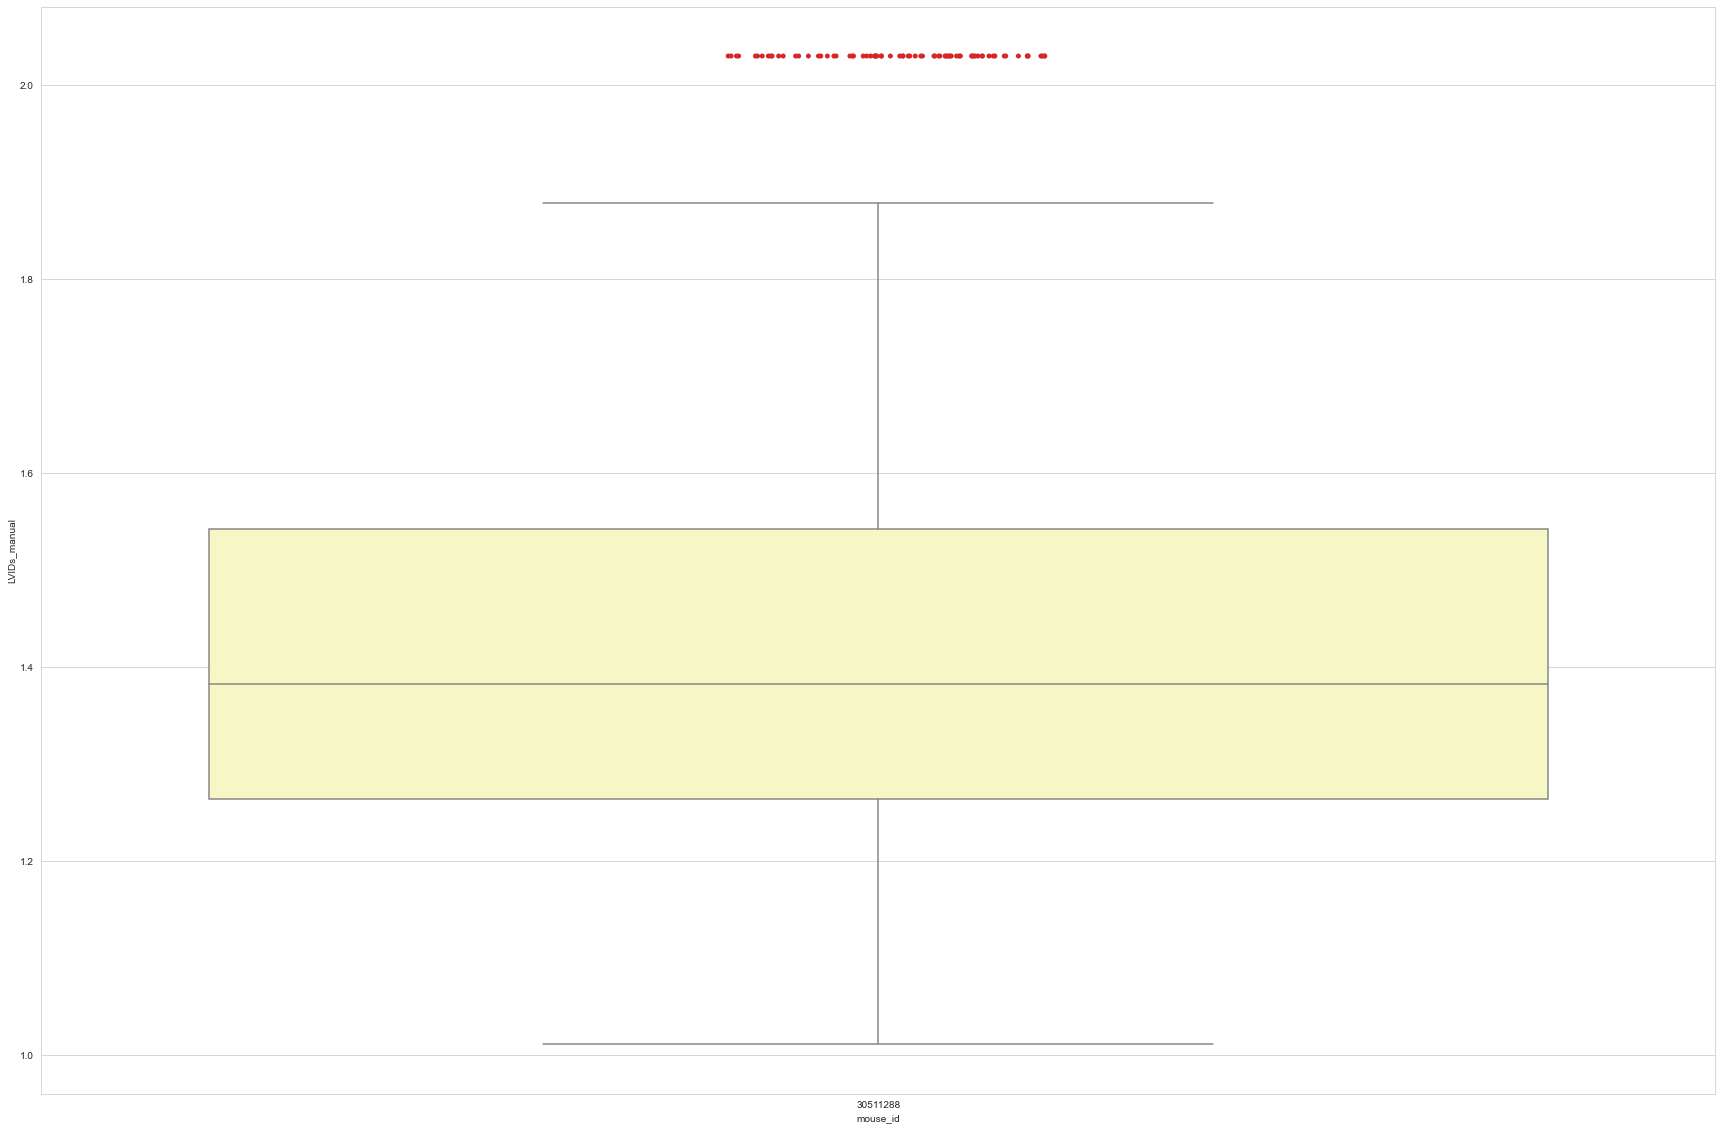

In [7]:
fig = plt.subplots(figsize= (30,20))
sns.boxplot(data=filtered_data,  x="mouse_id", y="LVIDd_auto", palette=colors1)
sns.stripplot(data= filtered_data, x = "mouse_id", y = "LVIDd_manual", color=colors2)

fig = plt.subplots(figsize= (30,20))
sns.boxplot(data=filtered_data,  x="mouse_id", y="LVIDs_auto", palette=colors1)
sns.stripplot(data= filtered_data, x = "mouse_id", y = "LVIDs_manual", color=colors2)

### Overview per mouse per parameter

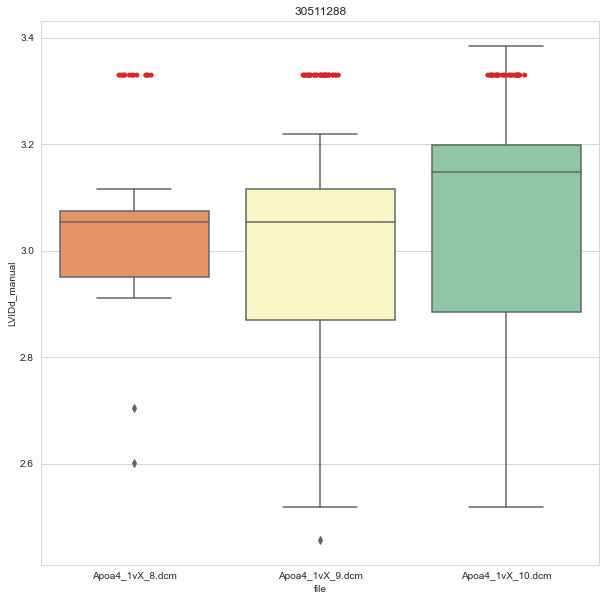

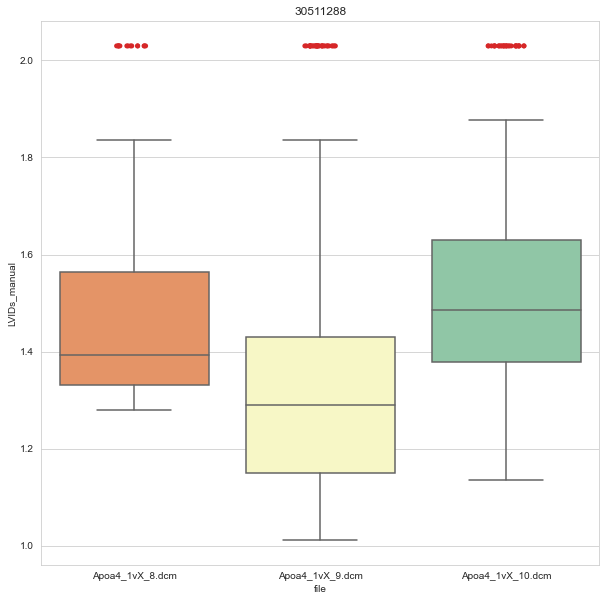

In [8]:
for mouse in mice_automatic:
    fig = plt.subplots(figsize= (10,10))
    sns.boxplot(data=filtered_data[filtered_data['mouse_id'] == mouse],  x="file", y="LVIDd_auto", palette=colors1)
    sns.stripplot(data= filtered_data[filtered_data['mouse_id'] == mouse], x = "file", y = "LVIDd_manual", color=colors2)
    plt.title(mouse)

    fig = plt.subplots(figsize= (10,10))
    sns.boxplot(data=filtered_data[filtered_data['mouse_id'] == mouse],  x="file", y="LVIDs_auto", palette=colors1)
    sns.stripplot(data= filtered_data[filtered_data['mouse_id'] == mouse], x = "file", y = "LVIDs_manual", color=colors2)
    plt.title(mouse)

## Image quality

In [9]:
image_quality = pd.read_csv("../image_quality_all_files.csv")
image_quality = image_quality[image_quality['mouse_id'].isin(mice_manual)]
image_quality

,mouse_id,file_name,high_image_quality,low_image_quality
113,30511288,Apoa4_1vX_10,51.379133,48.620867
114,30511288,Apoa4_1vX_7,0.000000,100.000000
115,30511288,Apoa4_1vX_9,55.806783,44.193217
116,30511288,Apoa4_1vX_8,29.278739,70.721261


### Image quality per mouse

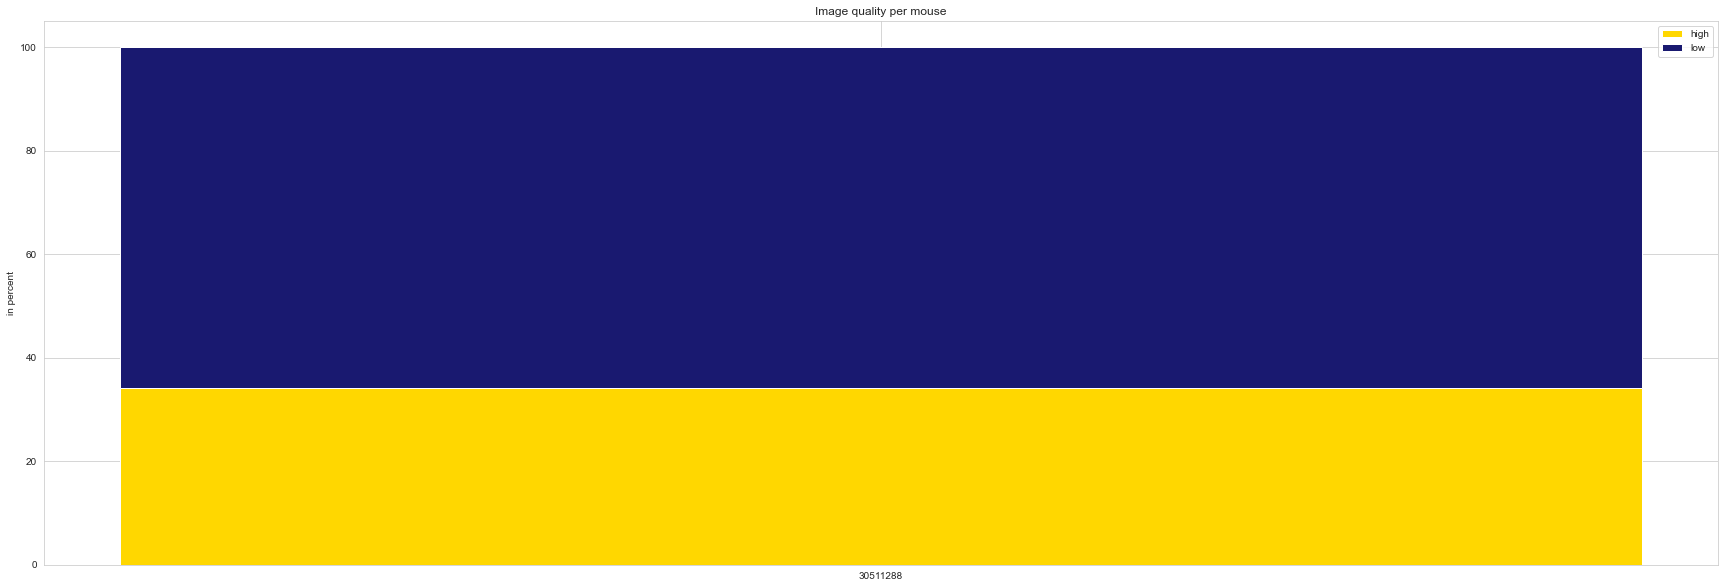

In [10]:
image_quality_mouse = image_quality.groupby(by = ['mouse_id']).mean().reset_index()
image_quality_mouse['mouse_id'] = image_quality_mouse['mouse_id'].astype(str)
image_quality_mouse.sort_values(by=['high_image_quality'], inplace = True)
labels = image_quality_mouse['mouse_id']
good_parts = image_quality_mouse['high_image_quality']
bad_parts = image_quality_mouse['low_image_quality']
width = 0.5   

fig, ax = plt.subplots(figsize=(30,10))

ax.bar(labels, good_parts, width, label='high', color='gold')
ax.bar(labels, bad_parts, width, bottom = good_parts, label='low', color='midnightblue')

ax.set_ylabel('in percent')
ax.set_title('Image quality per mouse')
ax.legend()

plt.show()

In [11]:
image_quality = pd.DataFrame([[image_quality['high_image_quality'].describe()['mean'],
                             image_quality['low_image_quality'].describe()['mean']]], 
                             index = [gene],
                             columns= ['high image quality', 'low image quality'])
image_quality = image_quality.round(2)
image_quality

,high image quality,low image quality
Apoa4,34.12,65.88


## Calculation of stats

In [12]:
# LVIDs diastole 
lvidd_good_stats = filtered_data[['dif_LVIDd']].describe()
lvidd_good_stats.rename(columns = {'dif_LVIDd': 'diff LVIDd'}, inplace=True)

In [13]:
# LVIDs systole
lvids_good_stats = filtered_data[['dif_LVIDs']].describe()
lvids_good_stats.rename(columns = {'dif_LVIDs': 'diff LVIDs'}, inplace=True)

In [14]:
# Ejection Fraction
ej_fraction_good_stats = filtered_data[['dif_EF']].describe()
ej_fraction_good_stats.rename(columns={'dif_EF':'diff ejection fraction'}, inplace=True)

In [15]:
# Fractional Shortening
fs_good_stats = filtered_data[['dif_FS']].describe()
fs_good_stats.rename(columns={'dif_FS':'diff fractional shortening'}, inplace=True)

In [16]:
stats_df = pd.concat([lvidd_good_stats,
                      lvids_good_stats,
                      ej_fraction_good_stats,
                      fs_good_stats
                     ],axis=1)
df = pd.DataFrame([[len(np.unique(filtered_data['mouse_id'])),
                    len(np.unique(filtered_data['mouse_id'])),
                    len(np.unique(filtered_data['mouse_id'])),
                    len(np.unique(filtered_data['mouse_id']))]], 
                  index = ['number of mice'],columns= stats_df.columns)
stats_df = stats_df.append(df)
stats_df.rename(index={'count':'number of measurements'}, inplace=True)
stats_df = stats_df.round(2)
stats_df

,diff LVIDd,diff LVIDs,diff ejection fraction,diff fractional shortening
number of measurements,74.00,74.00,74.00,74.00
mean,-0.33,-0.62,14.93,14.70
std,0.21,0.20,5.16,5.92
min,-0.87,-1.02,-3.16,-3.22
25%,-0.44,-0.77,12.24,11.29
50%,-0.27,-0.65,15.97,15.34
75%,-0.18,-0.49,18.26,18.50
max,0.05,-0.15,23.00,26.27
number of mice,1.00,1.00,1.00,1.00


In [17]:
# Creation of subgroups
f_man = manual[manual['sex'] == 'f']
m_man = manual[manual['sex'] == 'm']

In [18]:
means_auto = filtered_data.groupby(by = ['mouse_id', 'sex', 'genotype', 'type']).mean().reset_index()
means_auto_f = means_auto[means_auto['sex'] == 'f']
means_auto_m = means_auto[means_auto['sex'] == 'm']

In [19]:
num_stats = pd.DataFrame(
    [[len(f_man[f_man['genotype'] == 'control']),
      len(means_auto_f[means_auto_f['genotype'] == 'control'])],
     [len(m_man[m_man['genotype'] == 'control']),
      len(means_auto_m[means_auto_m['genotype'] == 'control'])
    ]],
    index = ['f', 'm'], 
    columns = ['man con', 'auto con']
)
num_stats

,man con,auto con
f,0,0
m,1,1


In [20]:
image_quality.to_csv(gene + '_image_quality_per_line.csv')
num_stats.to_csv(gene + '_number_of_mice.csv')